### Multi class classification of Fashion Apparels using DNN

### Open fashion_mnist dataset from keras

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data # To load the MNIST digit dat



11490434/11490434 [==============================] - 7s 1us/step


### Perform basic Exploratory Data Analysis(EDA)

In [4]:
(X_train, y_train) , (X_test, y_test) = load_data() # Loading data

In [6]:
print(X_train.shape)
print(y_train.shape)


(60000, 28, 28)
(60000,)


In [8]:
print(X_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [15]:
import matplotlib.pyplot as plt
import matplotlib

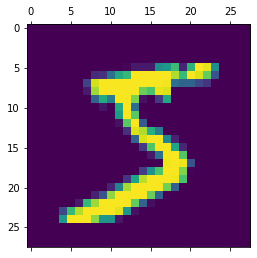

In [17]:
plt.matshow(X_train[0])

In [18]:
y_train[0]

5

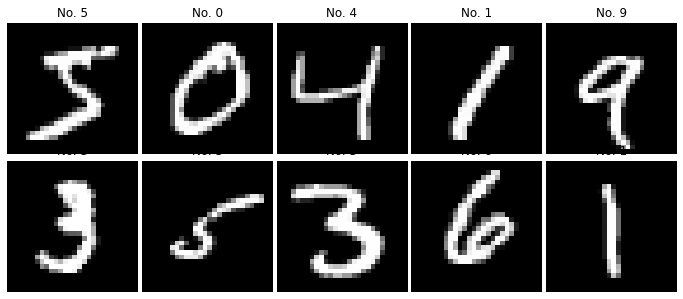

In [25]:
# code to view the images
num_rows, num_cols = 2, 5
f, ax = plt.subplots(num_rows,num_cols,figsize=(12,5),gridspec_kw={'wspace':0.03, 'hspace':0.03})
for r in range(num_rows):
        for c in range(num_cols):
            image_index = r * 10 + c
            ax[r,c].axis("off")
            ax[r,c].imshow( X_train[image_index], cmap='gray')
            ax[r,c].set_title('No. %d' % y_train[image_index])
plt.show()
plt.close()

### Normalize

In [26]:
X_train = X_train / 255
X_test = X_test / 255

In [27]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [28]:
X_train.shape

(60000, 28, 28)

In [29]:
X_train_flattened = X_train.reshape(len(X_train), 28*28) # converting our 2D array
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [30]:
X_train_flattened.shape

(60000, 784)

### Build a simple baseline model

In [12]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense

In [13]:
model1 = Sequential()
model1.add(Dense(10, input_shape=(784,), activation='softmax'))

In [14]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [31]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [33]:
model1.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 540us/step - loss: 0.4678 - accuracy: 0.8779
Epoch 2/5
1875/1875 [==============================] - 1s 526us/step - loss: 0.3035 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 1s 533us/step - loss: 0.2833 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 1s 522us/step - loss: 0.2730 - accuracy: 0.9230
Epoch 5/5
1875/1875 [==============================] - 1s 527us/step - loss: 0.2670 - accuracy: 0.9255


In [34]:
model1.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 447us/step - loss: 0.2716 - accuracy: 0.9243


[0.2715983986854553, 0.9243000149726868]

In [37]:
import numpy as np

In [38]:
y_pred = model1.predict(X_test_flattened)
np.argmax(y_pred[56])

313/313 [==============================] - 0s 298us/step


4

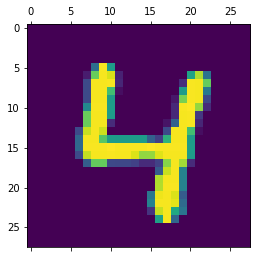

In [39]:
plt.matshow(X_test[56])

### Performance analysis

In [52]:
model2 = Sequential()
model2.add(Dense(1028, input_shape=(784,), activation='relu')) #input layer with 1028
model2.add(Dense(512,activation='relu')) #hidden layer with 512 neuron
model2.add(Dense(256,activation='relu')) #hidden layer with 256 neuron
model2.add(Dense(128,activation='relu')) #hidden layer with 128 neuron
model2.add(Dense(10, activation='softmax')) #output layer with 10 neuron
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1028)              806980    
                                                                 
 dense_15 (Dense)            (None, 512)               526848    
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dense_17 (Dense)            (None, 128)               32896     
                                                                 
 dense_18 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,499,342
Trainable params: 1,499,342
Non-trainable params: 0
_________________________________________________________________


In [53]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [54]:
model2.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2034 - accuracy: 0.9383
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0959 - accuracy: 0.9715
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0692 - accuracy: 0.9790
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0541 - accuracy: 0.9836
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0480 - accuracy: 0.9863


In [60]:
model2.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0617 - accuracy: 0.9851


[0.06167244166135788, 0.9850999712944031]

In [61]:
model3= Sequential()
model3.add(Dense(1028, input_shape=(784,), activation='relu')) #input layer with 1028
model3.add(Dense(512,activation='relu')) #hidden layer with 512 neuron
model3.add(Dense(256,activation='relu')) #hidden layer with 256 neuron
model3.add(Dense(128,activation='relu')) #hidden layer with 128 neuron
model3.add(Dense(10, activation='softmax')) #output layer with 10 neuron
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1028)              806980    
                                                                 
 dense_20 (Dense)            (None, 512)               526848    
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,499,342
Trainable params: 1,499,342
Non-trainable params: 0
_________________________________________________________________


In [62]:
model3.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [63]:
model3.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5243 - accuracy: 0.8630
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2076 - accuracy: 0.9395
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1514 - accuracy: 0.9554
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1176 - accuracy: 0.9661
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0957 - accuracy: 0.9720
